**STEP 1: Import Required Libraries**

In [18]:
# ===================================================================================#
# TITLE: Comparative Machine Learning for High-Precision Anomaly Detection on NSL-KDD#
# AUTHOR: Ahmad Abdullah (Research Implementation)                                   #
# ===================================================================================#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Algorithms and Evaluation Metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

print("Setup Complete.")

Setup Complete.


**STEP 2: Loading the Datasets**

In [19]:
# Load the NSL-KDD datasets
train_data = pd.read_csv("kdd_train.csv")
test_data = pd.read_csv("kdd_test.csv")

print(f"Training data loaded: {train_data.shape}")
print(f"Testing data loaded: {test_data.shape}")

Training data loaded: (125973, 42)
Testing data loaded: (22544, 42)


**STEP 3: Binary Label Transformation**

In [20]:
# Convert attack labels to binary: 0 (Normal) and 1 (Anomaly)
train_data['target'] = train_data['labels'].apply(lambda x: 0 if x == 'normal' else 1)
test_data['target'] = test_data['labels'].apply(lambda x: 0 if x == 'normal' else 1)

print("Target distribution in Train set:")
print(train_data['target'].value_counts())

Target distribution in Train set:
target
0    67343
1    58630
Name: count, dtype: int64


**STEP 4: Categorical Feature Encoding**

In [21]:
# Encode categorical features: protocol_type, service, and flag
categorical_cols = ['protocol_type', 'service', 'flag']

for col in categorical_cols:
    le = LabelEncoder()
    # Fit on union of both sets to handle unseen categories
    le.fit(pd.concat([train_data[col], test_data[col]], axis=0))
    train_data[col] = le.transform(train_data[col])
    test_data[col] = le.transform(test_data[col])

print("Encoding Complete.")

Encoding Complete.


**STEP 5: Feature Scaling and Data Splitting**

In [22]:
# Separate features (X) and target (y)
X_train = train_data.drop(['labels', 'target'], axis=1)
y_train = train_data['target']
X_test = test_data.drop(['labels', 'target'], axis=1)
y_test = test_data['target']

# Feature Standardization (Z-score Normalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling and splitting complete.")

Feature scaling and splitting complete.


**STEP 6: Training the Machine Learning Models**

In [23]:
print("Training models... this may take a moment.")

# 1. Logistic Regression
lr = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train)

# 2. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train_scaled, y_train)

# 3. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_scaled, y_train)

# 4. XGBoost (Boosting Ensemble - Added)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train_scaled, y_train)

print("All models trained successfully.")

Training models... this may take a moment.
All models trained successfully.


**Step 7: Quantitative Evaluation Table**

In [24]:
# Prepare evaluation metrics
model_list = [('Logistic Regression', lr), ('KNN', knn), ('Random Forest', rf), ('XGBoost', xgb)]
metrics_summary = []

print("\n" + "="*50)
print(f"{'Algorithm':<20} | {'Acc':<7} | {'Prec':<7} | {'Rec':<7} | {'F1':<7}")
print("-" * 50)

for name, model in model_list:
    y_pred = model.predict(X_test_scaled)
    acc, prec, rec, f1 = accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

    metrics_summary.append([acc, prec, rec, f1])
    print(f"{name:<20} | {acc:.4f} | {prec:.4f} | {rec:.4f} | {f1:.4f}")

print("="*50)


Algorithm            | Acc     | Prec    | Rec     | F1     
--------------------------------------------------
Logistic Regression  | 0.8923 | 0.9514 | 0.8273 | 0.8850
KNN                  | 0.9263 | 0.9907 | 0.8610 | 0.9214
Random Forest        | 0.9281 | 0.9911 | 0.8642 | 0.9233
XGBoost              | 0.9400 | 0.9908 | 0.8886 | 0.9369


**Step 8: Quantitative Performance Comparison (Bar Chart)**

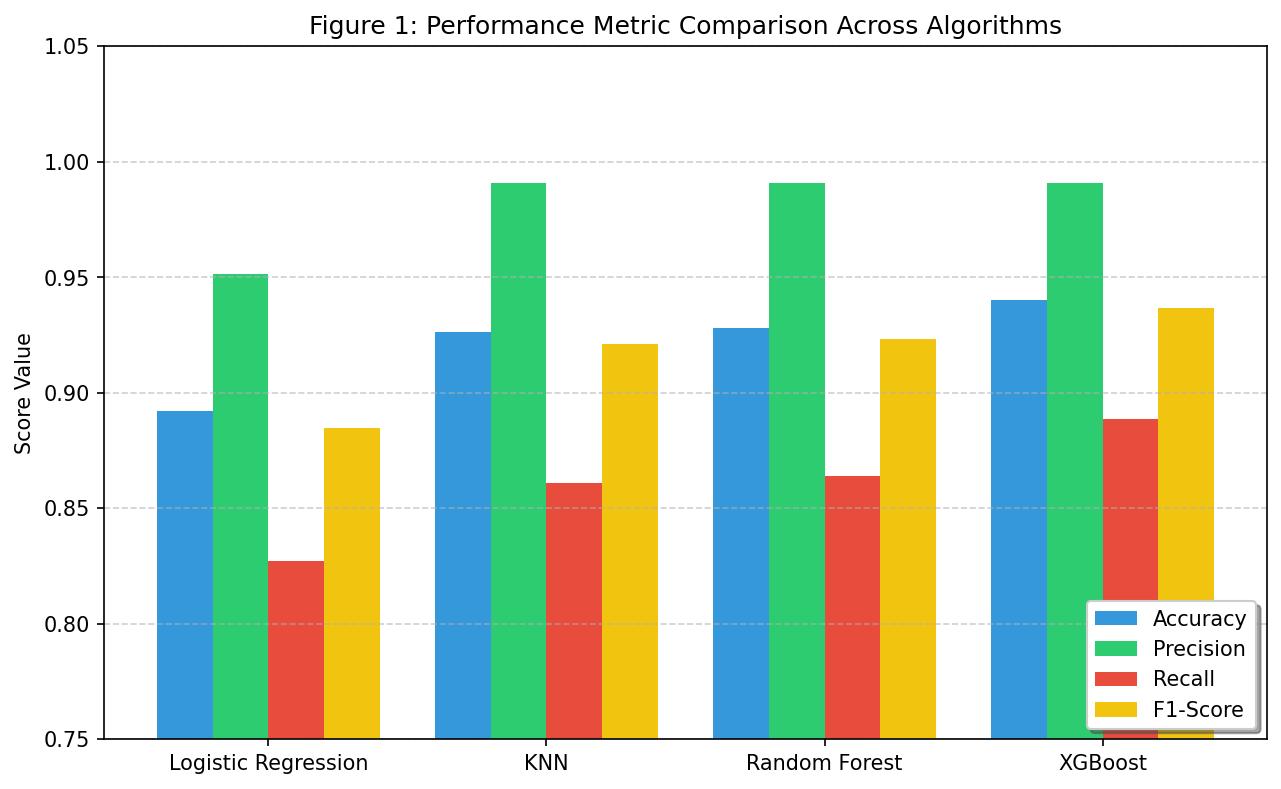

In [25]:
# Extract metrics for plotting
acc_list, prec_list, rec_list, f1_list = zip(*metrics_summary)
model_names = [m[0] for m in model_list]
x = np.arange(len(model_names))
width = 0.2

plt.figure(figsize=(10, 6), dpi=150)
plt.bar(x - 1.5*width, acc_list, width, label='Accuracy', color='#3498db')
plt.bar(x - 0.5*width, prec_list, width, label='Precision', color='#2ecc71')
plt.bar(x + 0.5*width, rec_list, width, label='Recall', color='#e74c3c')
plt.bar(x + 1.5*width, f1_list, width, label='F1-Score', color='#f1c40f')

plt.ylabel('Score Value')
plt.title('Figure 1: Performance Metric Comparison Across Algorithms')
plt.xticks(x, model_names)
plt.legend(loc='lower right', frameon=True, shadow=True)
plt.ylim(0.75, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.savefig('model_comparison_bar.png', bbox_inches='tight')
plt.show()

**Step 9: Error Distribution Analysis (Confusion Matrix) for Random Forest and XGBoost**

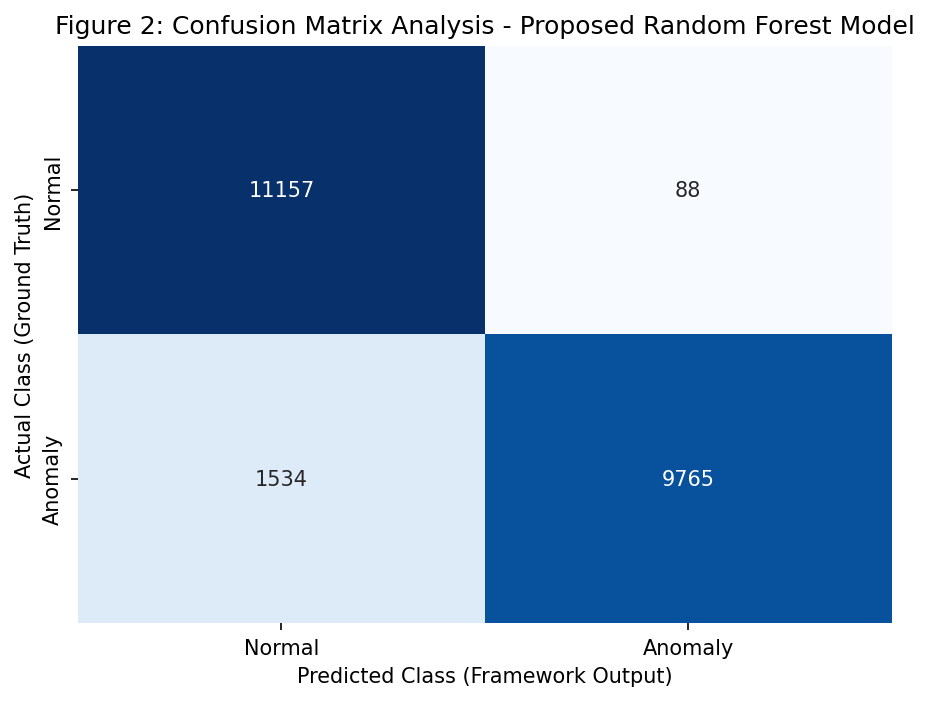

In [26]:
plt.figure(figsize=(7, 5), dpi=150)
y_pred_rf = rf.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])

plt.title('Figure 2: Confusion Matrix Analysis - Proposed Random Forest Model')
plt.ylabel('Actual Class (Ground Truth)')
plt.xlabel('Predicted Class (Framework Output)')

plt.savefig('confusion_matrix_rf.png', bbox_inches='tight')
plt.show()

**Step 10: Explainable AI (Feature Importance)**

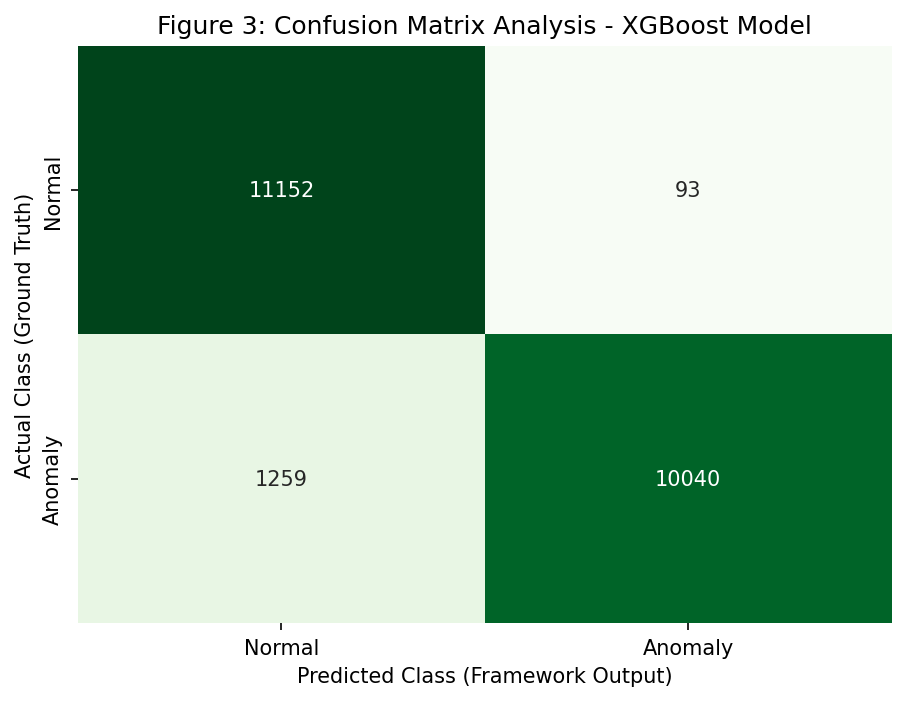

In [27]:
# Generate predictions for XGBoost
y_pred_xgb = xgb.predict(X_test_scaled)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plotting the Confusion Matrix
plt.figure(figsize=(7, 5), dpi=150)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])

plt.title('Figure 3: Confusion Matrix Analysis - XGBoost Model')
plt.ylabel('Actual Class (Ground Truth)')
plt.xlabel('Predicted Class (Framework Output)')

# Save the plot for comparative analysis
plt.savefig('confusion_matrix_xgb.png', bbox_inches='tight')
plt.show()

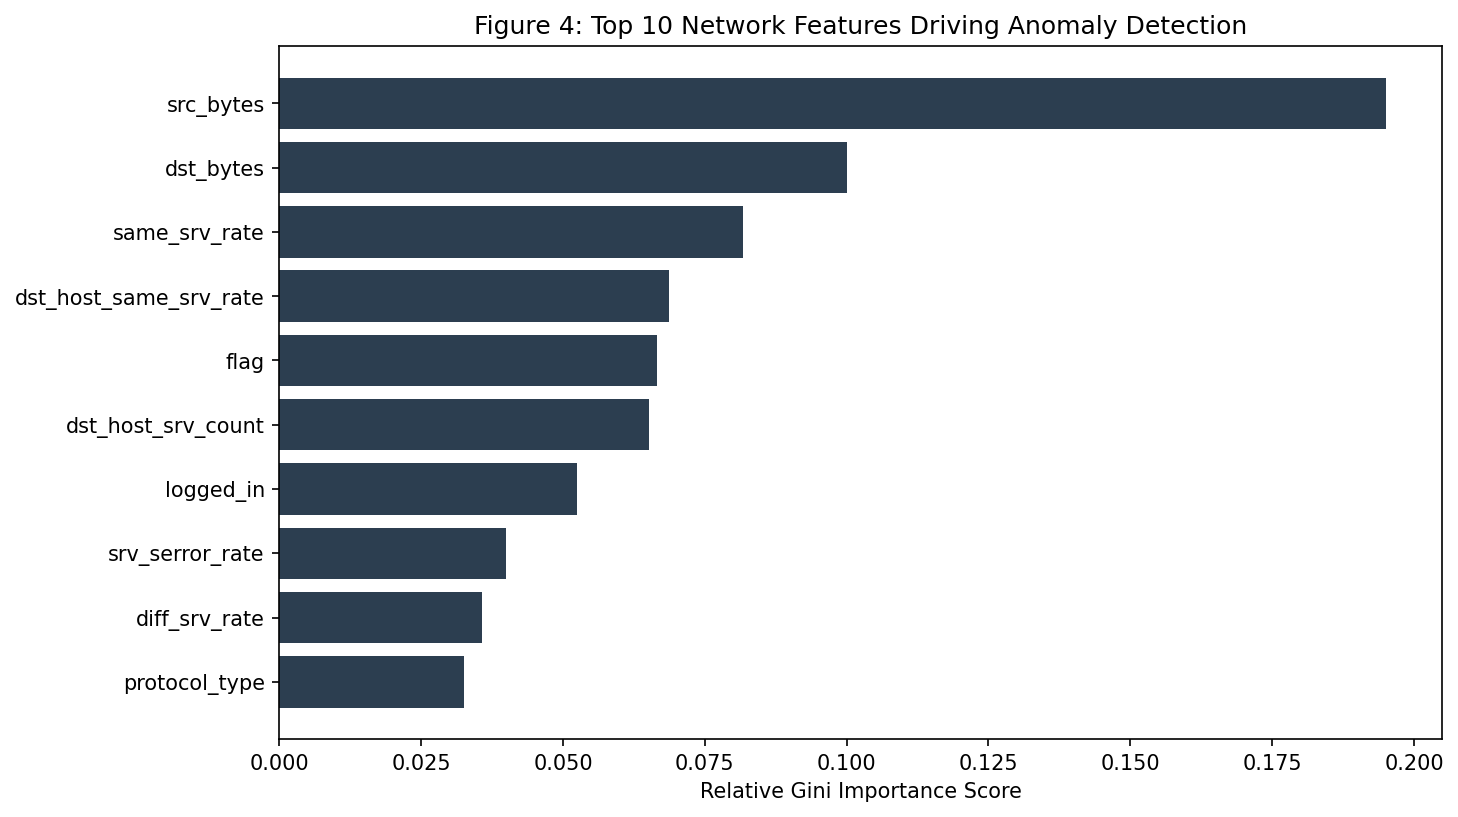

In [28]:
plt.figure(figsize=(10, 6), dpi=150)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:] # Select top 10 features

plt.title('Figure 4: Top 10 Network Features Driving Anomaly Detection')
plt.barh(range(len(indices)), importances[indices], color='#2c3e50', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Gini Importance Score')

plt.savefig('feature_importance.png', bbox_inches='tight')
plt.show()

**Step 11: Discriminative Power (ROC-AUC Curve)**

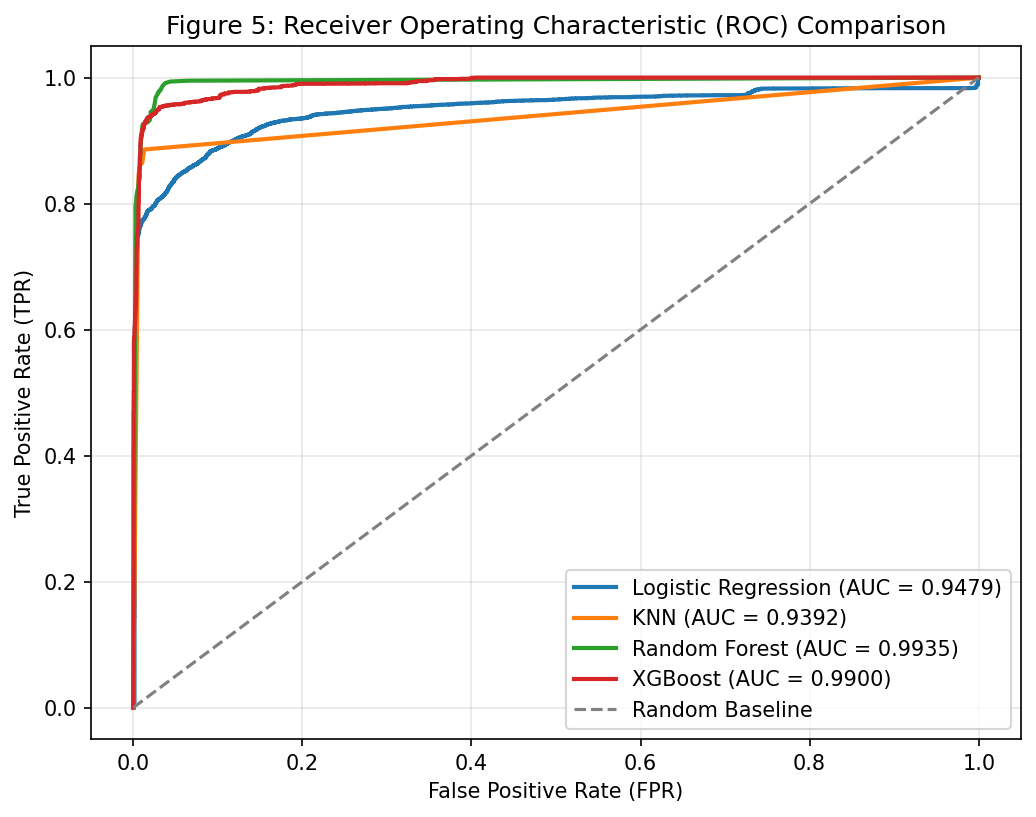

In [29]:
plt.figure(figsize=(8, 6), dpi=150)

for name, model in model_list:
    # Use predict_proba for ROC calculation
    probs = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Baseline')
plt.title('Figure 5: Receiver Operating Characteristic (ROC) Comparison')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)

plt.savefig('roc_curve_comparison.png', bbox_inches='tight')
plt.show()
